# Dollar Analysis


> ### In this repository I review and train theoretical model for forecasting the dollar based on oil prices, the euro on the previous day and the dollar for the previous 4 days. Naturally, this is only a theoretical model because it is not able to react to the political situation and the world situation. I am training a model for 5380 daily indicators of the factors listed above. I use the following main components: gradient descent and pandas library.


***

### First of all, we connect standard libraries for data analysis. Here are tools for analyzing and evaluating quality

In [209]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection, datasets, linear_model, metrics

***

### In the next step, we download all the data necessary for analysis and compile in the form convenient for us

> ### This research does not play a special role in predictive ability, but it can shed light on the stability and dependence of the Russian national currency. For this, we use 4 indicators of previous dollar values ​​as market influence. The cost of a barrel of oil as the state’s main export raw material and the price of the euro as an indicator of Europe’s main political neighbor (China is planned to be added later). Our hypothesis is that for the most part, the dollar depends on the price of oil.

#### Download and draw up the data for the dollar over the past 15 years

In [160]:
stat_of_dollar2=pd.read_csv('C:\Users\dilet\Desktop\workfords\usd_quotes.csv',sep=';')
stat_of_dollar=pd.DataFrame(columns=['price'])
for i in range(5385):
    stat_of_dollar.loc[len(stat_of_dollar)]=[stat_of_dollar2['price'][i]]
stat_of_dollar.shape

(5385, 1)

> ##### Charts in the reverse order as if looking from the past to the past

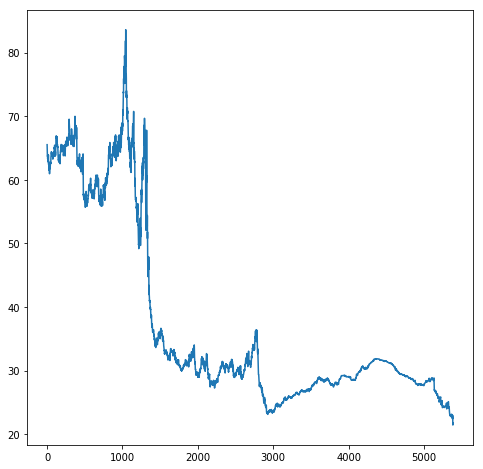

In [211]:
x=range(5385)
plt.plot(x,stat_of_dollar['price'][x])

#### Now we are loading data on the price per barrel of oil also for the last 15 years with the accuracy of matching in 1 day

In [162]:
course_of_oil2=pd.read_csv('C:\Users\dilet\Desktop\workfords\oil.csv',sep=';')
course_of_oil=pd.DataFrame(columns=['price'])
for i in range(29,5414):
    course_of_oil.loc[len(course_of_oil)]=[course_of_oil2['close'][i]]
course_of_oil.shape

(5385, 1)

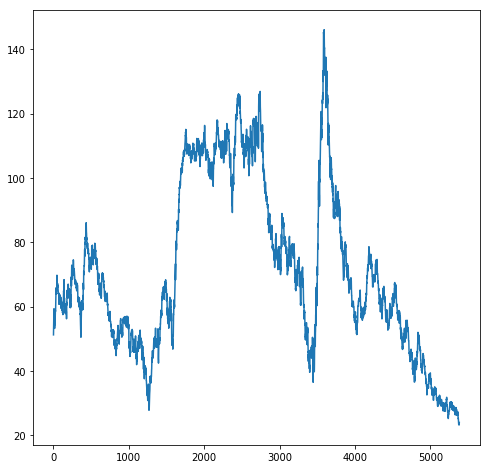

In [212]:
plt.plot(x,course_of_oil['price'][x])

#### Now download the data on the price of the Euro relative to the ruble

In [164]:
course_of_evro2=pd.read_csv('C:\Users\dilet\Desktop\workfords\eur_quotes.csv',sep=';')
course_of_evro=pd.DataFrame(columns=['price'])
for i in range(22,5407):
    course_of_evro.loc[len(course_of_evro)]=[course_of_evro2['price'][i]]
course_of_evro.shape

(5385, 1)

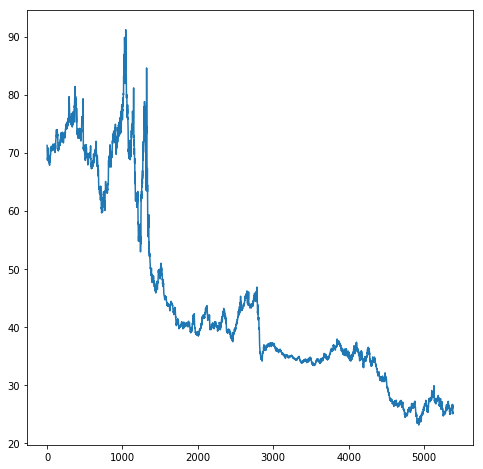

In [213]:
plt.plot(x,course_of_evro['price'][x])

***

### We bring everything into one table and start looking at pair dependencies

In [166]:
course_of_dollar=pd.DataFrame(columns=['price_in_date','price_1_day_before','price_2_day_before','price_3_day_before','price_4_day_before','oil_marker','evro_day_before'])
for i in range(5380):
    course_of_dollar.loc[len(course_of_dollar)] = [stat_of_dollar['price'][i],stat_of_dollar['price'][i+1],stat_of_dollar['price'][i+2],stat_of_dollar['price'][i+3],stat_of_dollar['price'][i+4],course_of_oil['price'][i+1],course_of_evro['price'][i+1]]

In [167]:
course_of_dollar.head(7)

,price_in_date,price_1_day_before,price_2_day_before,price_3_day_before,price_4_day_before,oil_marker,evro_day_before
0,65.5177,64.9213,64.3008,64.3008,63.7413,52.63,70.4591
1,64.9213,64.3008,64.3008,63.7413,63.6873,55.08,69.4191
2,64.3008,64.3008,63.7413,63.6873,63.7698,56.05,69.4191
3,64.3008,63.7413,63.6873,63.7698,63.3085,57.55,68.7705
4,63.7413,63.6873,63.7698,63.3085,63.4536,58.50,68.7823
5,63.6873,63.7698,63.3085,63.4536,63.6016,59.35,69.0882
6,63.7698,63.3085,63.4536,63.6016,63.0470,59.22,68.6201


#### We see very similar dependencies on market and Europe indicators, which should be expected due to their market nature

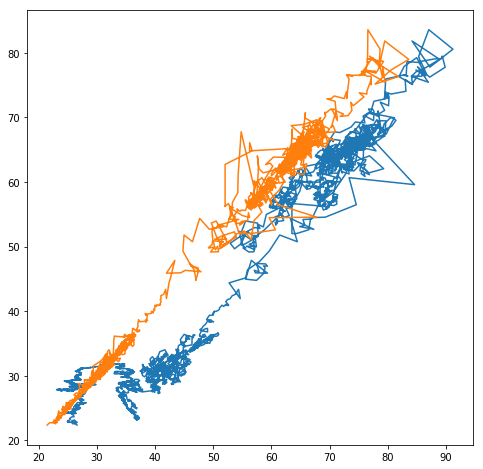

In [217]:
plt.plot(course_of_dollar['evro_day_before'],course_of_dollar['price_in_date'])
plt.plot(course_of_dollar['price_4_day_before'],course_of_dollar['price_in_date'])
plt.show()

#### The oil price chart is very strange. I suppose that it depends on the share of oil exports per year, but we will check this in the next study

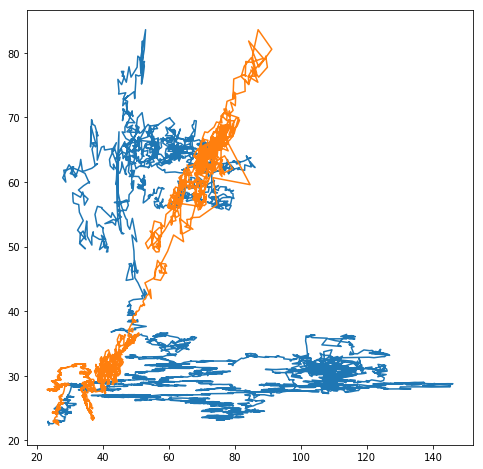

In [219]:
plt.plot(course_of_dollar['oil_marker'],course_of_dollar['price_in_date'])
plt.plot(course_of_dollar['evro_day_before'],course_of_dollar['price_in_date'])
plt.show()

#### We see a complete discrepancy, which can tell us about a different nature and the truth is that oil and the euro exchange rate have a weak correlation in terms of logic

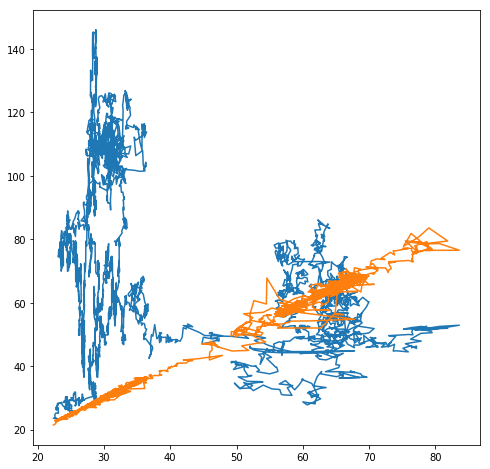

In [220]:
plt.plot(course_of_dollar['price_in_date'],course_of_dollar['oil_marker'])
plt.plot(course_of_dollar['price_in_date'],course_of_dollar['price_4_day_before'])
plt.show()

#### We prepare tables for a sample convenient for training## We prepare tables for a sample convenient for training

In [170]:
np_course_of_dollar = course_of_dollar.as_matrix()

C:\Users\dilet\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [171]:
np_course_of_dollar

array([[65.5177, 64.9213, 64.3008, ..., 63.7413, 52.63  , 70.4591],
       [64.9213, 64.3008, 64.3008, ..., 63.6873, 55.08  , 69.4191],
       [64.3008, 64.3008, 63.7413, ..., 63.7698, 56.05  , 69.4191],
       ...,
       [22.75  , 22.73  , 22.39  , ..., 22.37  , 23.39  , 26.31  ],
       [22.73  , 22.39  , 22.98  , ..., 21.88  , 23.74  , 25.93  ],
       [22.39  , 22.98  , 22.37  , ..., 21.45  , 23.59  , 26.59  ]])

***

### We create a six-dimensional function that will substitute each of its variables (which essentially displays the weight or significance of each factor in the forecast). And immediately check the standard error. Its minimization will bring on to the scales. For training we use the BFGS method

In [221]:
def  bigmoney(x):
    sred=0
    pred=pd.DataFrame(columns=['Predscazanie'])
    for i in range(5380):
        pred.loc[len(pred)]=x[0]*course_of_dollar['price_1_day_before'][i]+x[1]*course_of_dollar['price_2_day_before'][i]+x[2]*course_of_dollar['price_3_day_before'][i]+x[3]*course_of_dollar['price_4_day_before'][i]+x[4]*course_of_dollar['oil_marker'][i]+x[5]*course_of_dollar['evro_day_before'][i]
    for i in range(5380):
        sred=sred+((pred['Predscazanie'][i]-course_of_dollar['price_in_date'][i])**2)/5380
    return sred

In [183]:
from scipy.optimize import minimize

In [184]:
x1=5
x2=5
x3=5
x4=5
x5=5
x6=5
x0 = np.array([x1, x2, x3, x4,x5,x6])
res = minimize(bigmoney, x0, method='BFGS')
print(res.x)

[ 9.55509891e-01  7.08657880e-02 -2.99906467e-02  1.90240924e-03
 -1.22164716e-04  1.77516017e-03]


#### We get a very good result that speaks of the trained model

In [186]:
print bigmoney(res.x)

0.17507297788356352


### We use the resulting model to train the classifier which in the future will help us tell the growth or decline of the dollar

In [187]:
t=1.0
f=0.0
classification=pd.DataFrame(columns=['Solutoin'])
for i in range(5380):
    if res.x[0]*course_of_dollar['price_1_day_before'][i]+res.x[1]*course_of_dollar['price_2_day_before'][i]+res.x[2]*course_of_dollar['price_3_day_before'][i]+res.x[3]*course_of_dollar['price_4_day_before'][i]+res.x[4]*course_of_dollar['oil_marker'][i]+res.x[5]*course_of_dollar['evro_day_before'][i]>course_of_dollar['price_1_day_before'][i]:
    
        classification.loc[len(classification)]=[t]
    else:
        classification.loc[len(classification)]=[f] 
np_classification=classification.as_matrix()    

C:\Users\dilet\Anaconda2\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


In [188]:
res.x[0]*77.7325+res.x[1]*78.7223+res.x[2]*77.7928+res.x[3]*78.8493+res.x[4]*24.14+res.x[5]*86.56

77.82054648908019

In [189]:
np_classification

array([[0.],
       [1.],
       [0.],
       ...,
       [0.],
       [1.],
       [0.]])

In [190]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(np_course_of_dollar,np_classification , 
                                                                                    test_size = 0.3,
                                                                                    random_state = 1)

In [191]:
log_regressor = linear_model.LogisticRegression(random_state = 1)

In [192]:
log_regressor.fit(train_data, train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [193]:
lr_predictions = log_regressor.predict(test_data)

In [194]:
lr_proba_predictions = log_regressor.predict_proba(test_data)

In [195]:
print test_labels.reshape(1,1614)

[[0. 1. 0. ... 1. 0. 1.]]


In [196]:
print lr_predictions

[0. 1. 1. ... 1. 0. 1.]


In [197]:
print lr_proba_predictions

[[9.63813913e-01 3.61860873e-02]
 [4.17031367e-02 9.58296863e-01]
 [4.27835531e-01 5.72164469e-01]
 ...
 [9.54484223e-02 9.04551578e-01]
 [9.99951205e-01 4.87947322e-05]
 [9.74573295e-02 9.02542671e-01]]


### We check the quality metric and make sure the success of our research

In [198]:
print metrics.accuracy_score(test_labels, lr_predictions)

0.952912019826518


#### [My name is nikita and novice data scientist. If you want help me in my work](https://vk.com/quasiperelman)